In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataloc = 'agubh2-10km' #where csv files are
savefolder = 'data-agubh2-10km_0hrflood' #folder name of data

filepathcore = f'/Volumes/SAF_Data/NAYS2DH_files/Data/Raw/{dataloc}/'

savefilesto = f'/Volumes/SAF_Data/NAYS2DH_files/Data/ConvertedArrays/{savefolder}/'
idf = '0hfld' #identifier so all the datamaster files arent named the same
iricoutputt = 1/6 #time of output in hours

In [3]:
gridx = 1001
gridy = 26
datacond = 1
if datacond == 1:
    cells = gridy
else:
    cells = gridx
length = 1001#length of the domain in the x direction
erostart = 5
erostop = 5

num_timesteps = len(os.listdir(filepathcore))-1
print(num_timesteps)

position = np.arange(0, length, dtype = float)
coevelev = np.empty([num_timesteps])
len(coevelev)
#print(coevelev[40])

interval_to_plot = 120/60 #we want to plot every ___  HOURS 
intstring = '2hour'
skipstep = int(interval_to_plot/iricoutputt) #the skip rate
print(skipstep)
end_t = len(np.arange(1, num_timesteps, skipstep)) #number of timesteps in data master array
print(skipstep, end_t)  

datamaster = np.empty([gridx*gridy, 12, end_t]) #22 output variables
print(datamaster.shape)

4581
12
12 382
(26026, 12, 382)


In [4]:
np.arange(1, num_timesteps, skipstep)[312]

3745

In [5]:
for t, idx in zip(np.arange(1, num_timesteps, skipstep), np.arange(0, datamaster.shape[2])):
    #print(t, idx)
    fulldomaindata = pd.read_csv(filepathcore+'Result_'+str(t)+'.csv', header = 2, usecols = ['I', 'J', 'X', 'Y', 'Depth(m)', 'Elevation(m)', 'ShearStress(Nm-2)', 'ElevationChange(m)', 'FroudeNumber', 'ShieldsNumber','Velocity(ms-1) (magnitude)', 'BedloadFlux(m2s-1) (magnitude)'])
    #print(fulldomaindata['X']) ##indexing in data frames 
    #coevelev[t-1] = variation('Elevation(m)')
    #print(fulldomaindata.shape)
    datamaster[:, :, idx] = fulldomaindata
    #datamaster[t-1, :, :] = fulldomaindata
#print(coevelev)

In [6]:
print(filepathcore+'Result_'+str(t)+'.csv')

/Volumes/SAF_Data/NAYS2DH_files/Data/Raw/agubh2-10km/Result_4573.csv


In [8]:
np.save(savefilesto+f'{idf}-datamaster-{intstring}-flux', datamaster)

***

### Create mega downstream stratigraphy centreline array

In [34]:
init = '/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/streamwise-masters/agubh2-10km'
fullsection = np.load(f'{init}/1000-2000.npy')

### the first 10 columns, so 0-9
# for root, dirs, files in os.walk(init):
#     for file in files[1:]:
#         #print(file)
#         arr = np.load(os.path.join(root, file), allow_pickle = True)
#         fullsection = np.concatenate((fullsection, arr), axis = 1)
#         print(fullsection.shape)
#         #     plt.figure()
#         #     for i in range (0, len(arr)):
#         #         plt.plot(arr[i, :, 0])
#         #         plt.title(file)
# np.save(f'/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/streamwise-masters/fullsections/{dataloc}-centrefull', fullsection)

In [37]:
len(np.where(np.isnan(fullsection[:, :, 0]))[1])

3820

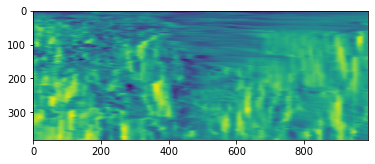

In [31]:
plt.imshow(fullsection[:, 10:, 0])

In [32]:
fullsection.shape

(382, 1000, 7)